In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# enable jupyter Notebook to display matplotlib graphs, use plt.show() for non-notebook users
%matplotlib inline

In [13]:
sales=pd.read_csv('WA_Sales_Products_2012-14.csv', sep='"',delimiter=',')
sales.head(1)

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489.0,0.347548


In [14]:
sales.describe()

,Year,Revenue,Quantity,Gross margin
count,31577.0,3.157700e+04,31576.000000,31421.000000
mean,2012.0,3.429372e+04,695.462313,0.445542
std,0.0,5.038891e+04,1316.616859,0.118275
min,2012.0,0.000000e+00,1.000000,-2.294049
25%,2012.0,7.544480e+03,116.000000,0.361866
50%,2012.0,1.761200e+04,290.000000,0.448174
75%,2012.0,4.084990e+04,731.000000,0.516955
max,2012.0,1.210414e+06,35122.000000,0.770476


In [15]:
sales['Revenue'].describe()

count    3.157700e+04
mean     3.429372e+04
std      5.038891e+04
min      0.000000e+00
25%      7.544480e+03
50%      1.761200e+04
75%      4.084990e+04
max      1.210414e+06
Name: Revenue, dtype: float64

In [17]:
sample_for_plotting=sales[['Product','Revenue' ]]
sample_for_plotting.head()

,Product,Revenue
0,TrailChef Deluxe Cook Set,59628.66
1,TrailChef Double Flame,35950.32
2,Star Dome,89940.48
3,Star Gazer 2,165883.41
4,Hibernator Lite,119822.20


In [18]:
plotting_group=sample_for_plotting.groupby('Product')
plotting_group.size().head()

Product
Aloe Relief           185
Astro Pilot           183
Bear Edge             204
Bear Survival Edge    182
Bella                 297
dtype: int64

In [19]:
total_sales=plotting_group.sum()
total_sales.head()

,Revenue
Product,
Aloe Relief,169535.68
Astro Pilot,4715980.00
Bear Edge,2529538.18
Bear Survival Edge,1930033.24
Bella,5525490.00


In [20]:
productline_revenue = sales.groupby('Product line').mean()['Revenue']
productline_revenue

Product line
Camping Equipment           41546.539214
Golf Equipment              55494.180341
Mountaineering Equipment    33162.368092
Outdoor Protection           7859.983723
Personal Accessories        31027.113174
Name: Revenue, dtype: float64

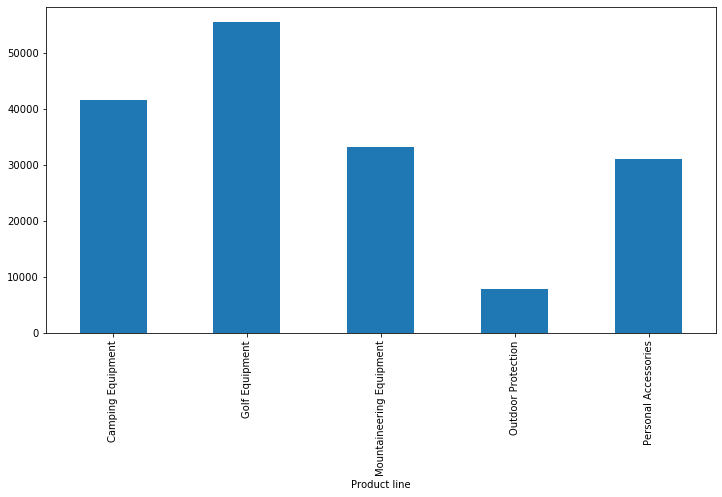

In [21]:
fig,axes = plt.subplots(figsize=(12,6))
revenue_plot = productline_revenue.plot(kind='bar')

In [22]:
sales_quantity = sales.groupby('Product type').mean()['Quantity']
sales_quantity.head()

Product type
Binoculars               171.088319
Climbing Accessories    1425.900000
Cooking Gear            1367.675788
Eyewear                  929.790460
First Aid                174.315789
Name: Quantity, dtype: float64

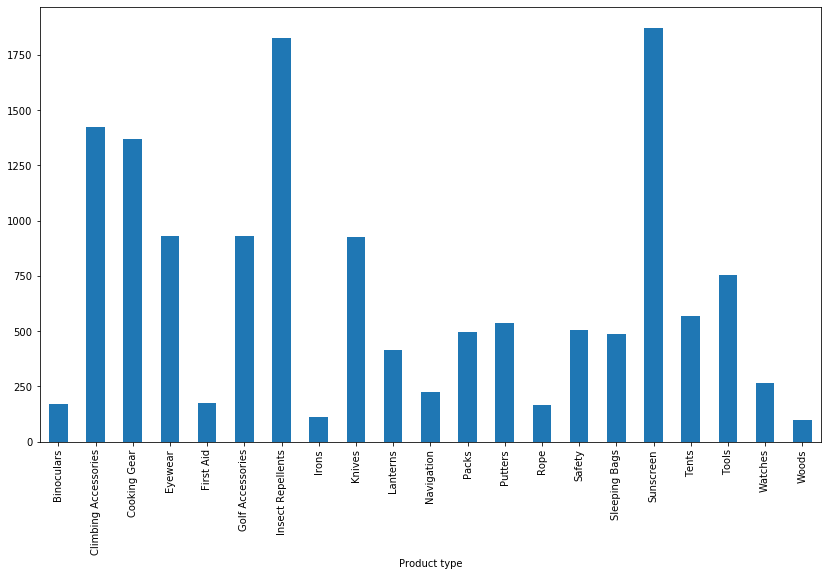

In [23]:
fig, axes = plt.subplots(figsize=(14,8))
quantity_plot= sales_quantity.plot(kind='bar')

Text(0, 0.5, 'Quantity')

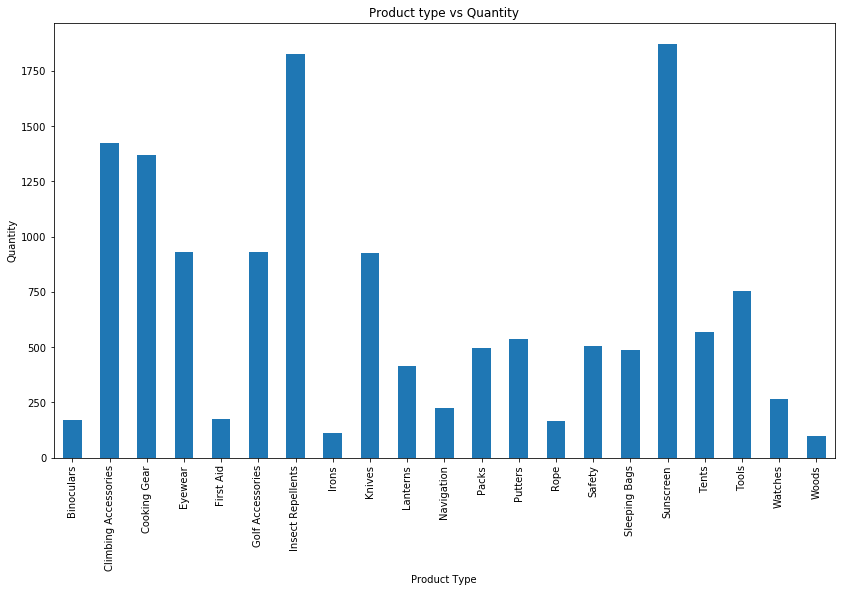

In [24]:
fig, axes = plt.subplots(figsize=(14,8))
quantity_plot= sales_quantity.plot(kind='bar', title="Product type vs Quantity")
quantity_plot.set_xlabel('Product Type')
quantity_plot.set_ylabel('Quantity')

In [25]:
customes = sales [['Product line','Product type', 'Quantity']]
category_group = customes.groupby(['Product line','Product type']).sum()
category_group.head()

Quantity
Product line      Product type            
Camping Equipment Cooking Gear   3298834.0
                  Lanterns       1048166.0
                  Packs           622697.0
                  Sleeping Bags   744454.0
                  Tents           784422.0

In [26]:
category_group.unstack()

Quantity                                    \
Product type             Binoculars Climbing Accessories Cooking Gear   
Product line                                                            
Camping Equipment               NaN                  NaN    3298834.0   
Golf Equipment                  NaN                  NaN          NaN   
Mountaineering Equipment        NaN            1468677.0          NaN   
Outdoor Protection              NaN                  NaN          NaN   
Personal Accessories       240208.0                  NaN          NaN   

                                                                \
Product type                Eyewear First Aid Golf Accessories   
Product line                                                     
Camping Equipment               NaN       NaN              NaN   
Golf Equipment                  NaN       NaN         745575.0   
Mountaineering Equipment        NaN       NaN              NaN   
Outdoor Protection              NaN  172224.0              NaN   
Personal Accessories      4814455.0       NaN              NaN   

                                                                           \
Product type             Insect Repellents    Irons     Knives   Lanterns   
Product line                                                                
Camping Equipment                      NaN      NaN        NaN  1048166.0   
Golf Equipment                         NaN  82372.0        NaN        NaN   
Mountaineering Equipment               NaN      NaN        NaN        NaN   
Outdoor Protection               1685175.0      NaN        NaN        NaN   
Personal Accessories                   NaN      NaN  1514283.0        NaN   

                          ...                                         \
Product type              ...     Packs   Putters     Rope    Safety   
Product line              ...                                          
Camping Equipment         ...  622697.0       NaN      NaN       NaN   
Golf Equipment            ...       NaN  313071.0      NaN       NaN   
Mountaineering Equipment  ...       NaN       NaN  98246.0  291630.0   
Outdoor Protection        ...       NaN       NaN      NaN       NaN   
Personal Accessories      ...       NaN       NaN      NaN       NaN   

                                                                       \
Product type             Sleeping Bags  Sunscreen     Tents     Tools   
Product line                                                            
Camping Equipment             744454.0        NaN  784422.0       NaN   
Golf Equipment                     NaN        NaN       NaN       NaN   
Mountaineering Equipment           NaN        NaN       NaN  612437.0   
Outdoor Protection                 NaN  1971258.0       NaN       NaN   
Personal Accessories               NaN        NaN       NaN       NaN   

                                              
Product type                Watches    Woods  
Product line                                  
Camping Equipment               NaN      NaN  
Golf Equipment                  NaN  69340.0  
Mountaineering Equipment        NaN      NaN  
Outdoor Protection              NaN      NaN  
Personal Accessories      1006575.0      NaN  

[5 rows x 21 columns]

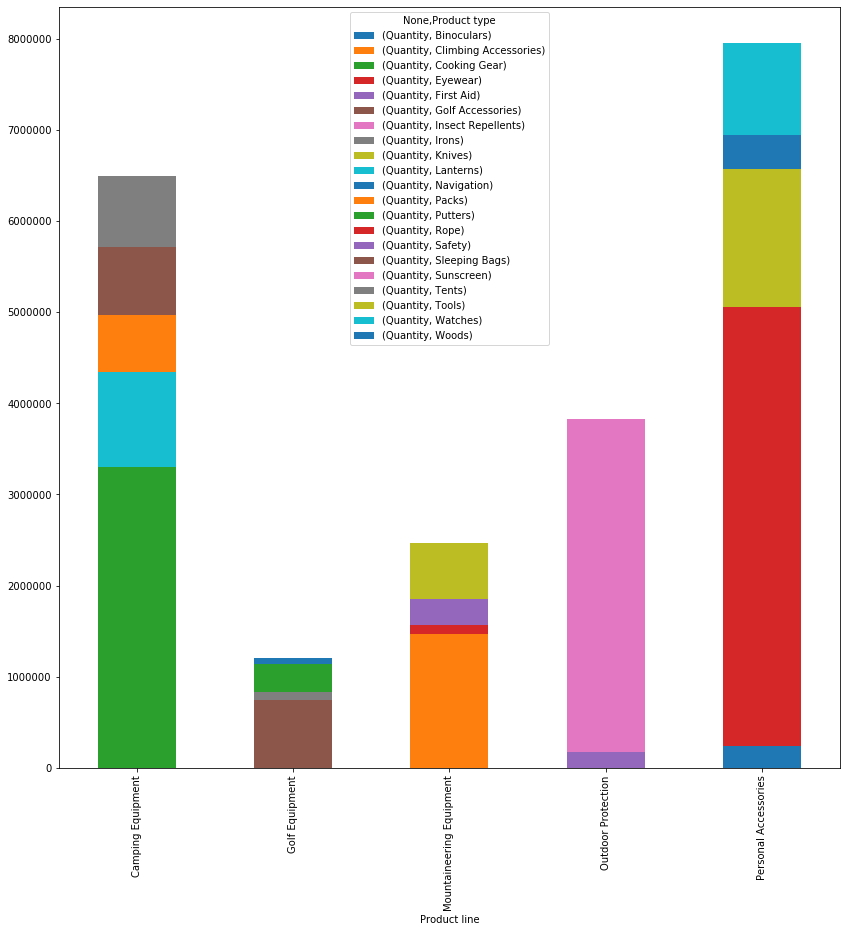

In [27]:
category_group_graph = category_group.unstack().plot(kind='bar',stacked=True,legend=('0'),figsize=(14,14))

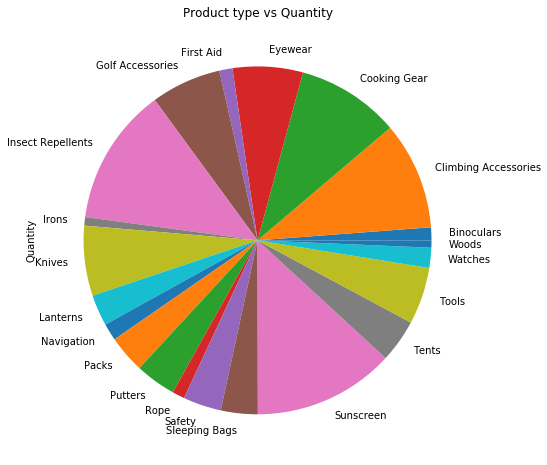

In [28]:
fig, axes = plt.subplots(figsize=(8,8))
quantity_plot= sales_quantity.plot(kind='pie', title="Product type vs Quantity")